#### imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Task

- *Split the MNIST dataset into training and testing sets (60k + 10k).\*
- *Train a Random Forest classifier and measure the training time. Calculate the accuracy on the test set.\*
- *Apply PCA with 95% explained variance. Repeat the training. Compare the training time and accuracy with the previous task.*
- *Repeat the same steps with Logistic Regression. Draw conclusions.*

## importing and splitting the data

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=60000, test_size=10000, random_state=42)

## Random Forest

### without PCA

In [ ]:
rdm_f = RandomForestClassifier()

start_time = time.time()
rdm_f.fit(X_train, y_train)
end_time = time.time()

In [ ]:
y_pred_rdm = rdm_f.predict(X_test)

In [ ]:
rdm_f_acc = accuracy_score(y_test, y_pred_rdm)
print(f'Accuracy: {rdm_f_acc}')
print(f'Model training time: {end_time - start_time:.2f} sec')

Accuracy: 0.9654
Model training time: 62.91 sec


### with PCA

In [ ]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
print(f'Number of components after PCA: {pca.n_components_}')

Number of components after PCA: 154


In [ ]:
start_time2 = time.time()
rdm_f.fit(X_train_pca, y_train)
end_time2 = time.time()

In [ ]:
y_pred2 = rdm_f.predict(X_test_pca)

In [ ]:
rdm_f_acc2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {rdm_f_acc2}')
print(f'Model training time: {end_time2 - start_time2:.2f} sec')

Accuracy: 0.9474
Model training time: 168.17 sec


### comparing results

In [ ]:
time = int(end_time - start_time)
time2 = int(end_time2 - start_time2)

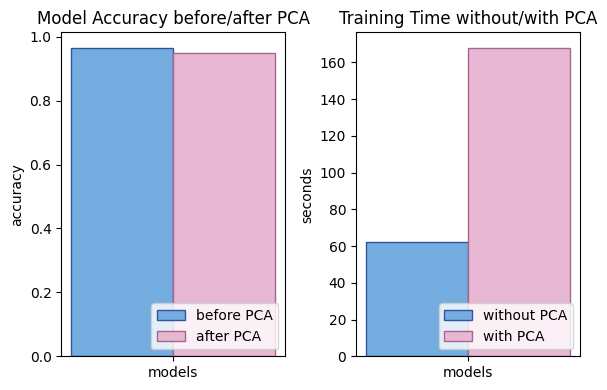

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(6, 4))

labels = ['models']
x = np.arange(len(labels))

axs[0].bar(x - 0.2/2, rdm_f_acc, 0.2, label='before PCA', color='#75ace0', edgecolor='#33539e')
axs[0].bar(x + 0.2/2, rdm_f_acc2, 0.2, label='after PCA', color='#e8b7d4', edgecolor='#a5678e')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].set_ylabel('accuracy')
axs[0].set_title('Model Accuracy before/after PCA')
axs[0].legend(loc='lower right')

axs[1].bar(x - 0.2/2, time, 0.2, label='without PCA', color='#75ace0', edgecolor='#33539e')
axs[1].bar(x + 0.2/2, time2, 0.2, label='with PCA', color='#e8b7d4', edgecolor='#a5678e')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].set_ylabel('seconds')
axs[1].set_title('Training Time without/with PCA')
axs[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

#### numerical values

In [ ]:
print('Accuracy:')
print(f'before PCA {rdm_f_acc}')
print(f'after PCA  {rdm_f_acc2}\n')
print('Model training time:')
print(f'before PCA  {end_time - start_time:.2f}')
print(f'after PCA   {end_time2 - start_time2:.2f}')

Accuracy:
before PCA 0.9654
after PCA  0.9487

Model training time:
before PCA  62.91
after PCA   168.42


#### conclusion

As we can see, the model's accuracy after applying PCA is still quite high, but it's worse than the accuracy of model without PCA.\
In training time there's a huge difference, time with PCA is more than twice longer than without PCA.\
First of all, I think it's because we're applying PCA on Random Forrest classifier that works great specificaly with high-dimensional data, and PCA just erases this structure.\
Also PCA doesn't considerate that we train the classifier next, so basically it retains the maximum variance in the data, but the components that explain the most variance may not be the ones that best separate the classes.

## Logistic Regression

### without PCA

In [ ]:
log = LogisticRegression()

start_time_l = time.time()
log.fit(X_train, y_train)
end_time_l = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_l = log.predict(X_test)

In [ ]:
l_acc = accuracy_score(y_test, y_pred_l)
print(f'Accuracy: {l_acc}')
print(f'Model training time: {end_time_l - start_time_l:.2f} sec')

Accuracy: 0.9189
Model training time: 41.39 sec


### with PCA

In [ ]:
start_time_l2 = time.time()
log.fit(X_train_pca, y_train)
end_time_l2 = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred_l2 = log.predict(X_test_pca)

In [ ]:
l_acc2 = accuracy_score(y_test, y_pred_l2)
print(f'Accuracy: {l_acc2}')
print(f'Model training time: {end_time_l2 - start_time_l2:.2f} sec')

Accuracy: 0.9141
Model training time: 8.25 sec


### comparing results

In [ ]:
timel = int(end_time_l - start_time_l)
timel2 = int(end_time_l2 - start_time_l2)

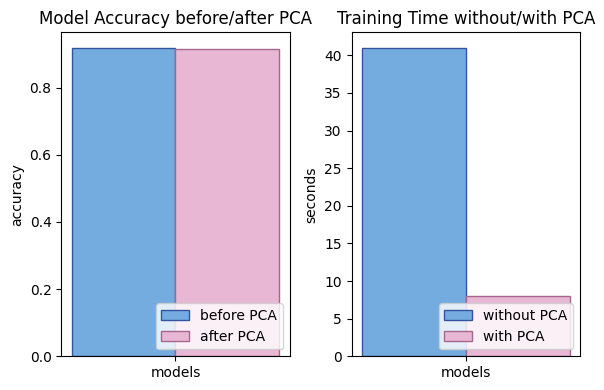

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(6, 4))

labels = ['models']
x = np.arange(len(labels))

axs[0].bar(x - 0.2/2, l_acc, 0.2, label='before PCA', color='#75ace0', edgecolor='#33539e')
axs[0].bar(x + 0.2/2, l_acc2, 0.2, label='after PCA', color='#e8b7d4', edgecolor='#a5678e')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].set_ylabel('accuracy')
axs[0].set_title('Model Accuracy before/after PCA')
axs[0].legend(loc='lower right')

axs[1].bar(x - 0.2/2, timel, 0.2, label='without PCA', color='#75ace0', edgecolor='#33539e')
axs[1].bar(x + 0.2/2, timel2, 0.2, label='with PCA', color='#e8b7d4', edgecolor='#a5678e')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].set_ylabel('seconds')
axs[1].set_title('Training Time without/with PCA')
axs[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

#### numerical values

In [ ]:
print('Accuracy:')
print(f'before PCA {l_acc}')
print(f'after PCA  {l_acc2}\n')
print('Model training time:')
print(f'before PCA  {end_time_l - start_time_l:.2f}')
print(f'after PCA   {end_time_l2 - start_time_l2:.2f}')

Accuracy:
before PCA 0.9189
after PCA  0.9141

Model training time:
before PCA  41.39
after PCA   8.25


#### conclusion

As we can see, still model accuracy without PCA is slightly higher, but training time with PCA is much shorter.\
I think it's because Logistic Regression works better with low dimensional data and is less sensitive to loss of features comparing to Random Forrest.\
This shows that PCA can be useful when we're using models like Logistic Regression(which works better with low dimensional data), as it helps save a lot of training time and keeps the accuracy almoust the same. However, the small drop in accuracy means PCA might not keep all the important information, so it's good to decide whether to use it based on the task and the model.

Thanks for attention!